<a href="https://colab.research.google.com/github/josemacoel/6-Regresion-Lineal/blob/main/Actividad_6_1_A01734153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6.1 (Regresión Lineal Simple)**
### José María Colombres Elguea | A01734153


---

# **México**

---



# **Preparación**

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
#Cargar archivo
df = pd.read_csv ('DF_Mexico_LIMPIO.csv')
df.head(5)

<ipython-input-317-663c45688b83>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('DF_Mexico_LIMPIO.csv')


,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2056638.0,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1,2072354.0,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2,696037.0,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3,35797.0,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,No Data Available,No Data Available,f
4,44616.0,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f


## **Limpieza Inicial**

Se realizó una limpieza final del archivo. Algunas columnas encontraban en formato str y se obtuvo un promedio para aquellos valores iguales o mayor a 1, para posteriormente cambiar los valores a float y no modificar el tamaño de la columna o los datos. 

In [318]:
(df["host_acceptance_rate"] == "No Data Available").sum()

2043

In [319]:
# Eliminar los símbolos de porcentaje
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('No Data Available', "94.44066297313655")

# Convertir la columna a tipo float
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

In [320]:
promedio = df.loc[df['host_acceptance_rate'] >= 1, 'host_acceptance_rate'].mean()
promedio

94.44066297313657

In [321]:
(df["host_response_rate"] == "No Data Available").sum()

3091

In [322]:
# Eliminar los símbolos de porcentaje
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].str.replace('No Data Available', "97.08839966953394")

# Convertir la columna a tipo float
df['host_response_rate'] = df['host_response_rate'].astype(float)

In [323]:
promedio = df.loc[df['host_response_rate'] >= 1, 'host_response_rate'].mean()
promedio

97.08839966953394

In [324]:
# Eliminar los símbolos de dinero
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').str.replace('.', '')
df['price'] = df['price'].str.replace('No Data Available', "190303.54267310788")

# Convertir la columna a tipo float
df['price'] = df['price'].astype(float)

<ipython-input-324-525da658f2ec>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').str.replace('.', '')


In [325]:
promedio = df.loc[df['price'] >= 1, 'price'].mean()
promedio

190303.54267310788

In [326]:
# Eliminar los valores str
df['number_of_reviews'] = df['number_of_reviews'].str.replace('f', '30')
df['number_of_reviews'] = df['number_of_reviews'].str.replace('No Data Available', "30")

# Convertir la columna a tipo float
df['number_of_reviews'] = df['number_of_reviews'].astype(float)
df['number_of_reviews'].fillna(30, inplace=True)

In [327]:
promedio = df.loc[df['number_of_reviews'] >= 1, 'number_of_reviews'].mean()
promedio

30.142801175318315

In [328]:
# Eliminar los valores str
df['availability_365'] = df['availability_365'].str.replace('2023-03-05', '237')
df['availability_365'] = df['availability_365'].str.replace('No Data Available', "237")

# Convertir la columna a tipo float
df['availability_365'] = df['availability_365'].astype(float)
df['availability_365'].fillna(237, inplace=True)

In [329]:
promedio = df.loc[df['availability_365'] >= 1, 'availability_365'].mean()
promedio

237.12800101086683

# **host_acceptance_rate vs host_response_rate**

## **Filtro 1**

In [85]:
df["room_type"].value_counts()

Entire home/apt    15601
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64

In [86]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",$980.00,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",$760.00,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...","$1,520.00",t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...","$1,200.00",t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

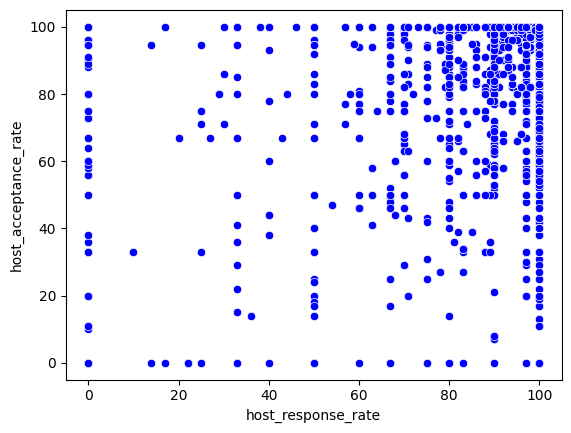

In [87]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)

In [88]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate']]
Var_Dep= filtro1['host_acceptance_rate']


In [89]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [90]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [91]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [92]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.44705719]),
 'rank_': 1,
 'singular_': array([1628.4290862]),
 'intercept_': 50.57597261862723}

In [93]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.12055658891854215

In [94]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.12055658891854215

In [95]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.34721259902045915

## **Filtro 2**

In [96]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...","$1,089.00",t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",$726.00,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",$375.00,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...","$2,835.00",t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...","$1,244.00",t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...","$1,280.00",t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",$750.00,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",$600.00,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",$251.00,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

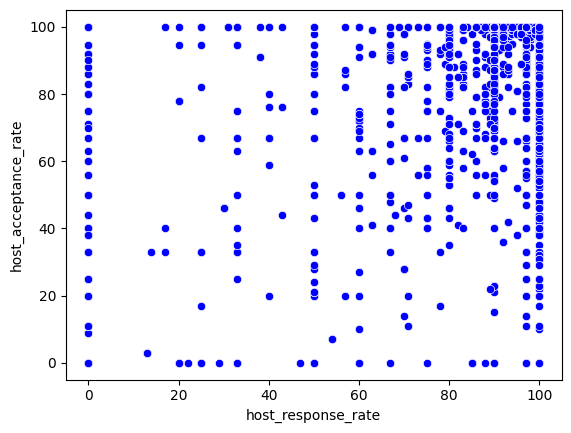

In [97]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro2)

In [98]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['host_response_rate']]
Var_Dep= filtro2['host_acceptance_rate']


In [99]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [100]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [101]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [102]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.37745877]),
 'rank_': 1,
 'singular_': array([2000.23070926]),
 'intercept_': 53.41102815506345}

In [103]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1188041874581457

In [104]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1188041874581457

In [105]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.34467983326290746

# **host_acceptance_rate vs price**

## **Filtro 1**

In [137]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",143400.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",83000.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",146900.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",365800.0,t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",1800000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",98000.0,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",76000.0,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",152000.0,t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",120000.0,t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

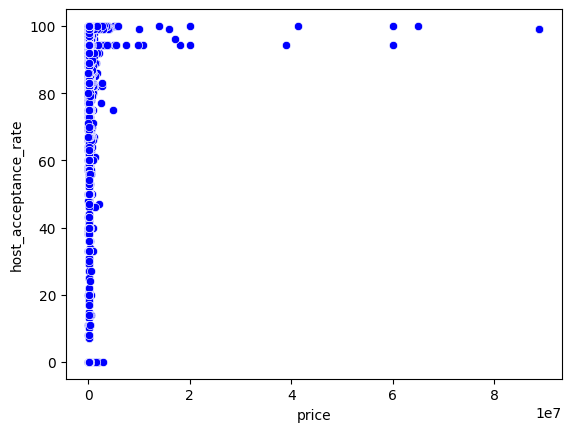

In [138]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro1)

In [139]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['price']]
Var_Dep= filtro1['host_acceptance_rate']


In [140]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [141]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [142]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [143]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.47010202e-08]),
 'rank_': 1,
 'singular_': array([1.82845449e+08]),
 'intercept_': 93.78488075578355}

In [144]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

2.275549321484327e-05

In [145]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

2.275549321484327e-05

In [146]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.004770271817710525

## **Filtro 2**

In [147]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",108900.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",72600.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",37500.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",283500.0,t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",124400.0,t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",128000.0,t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",75000.0,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",60000.0,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",25100.0,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

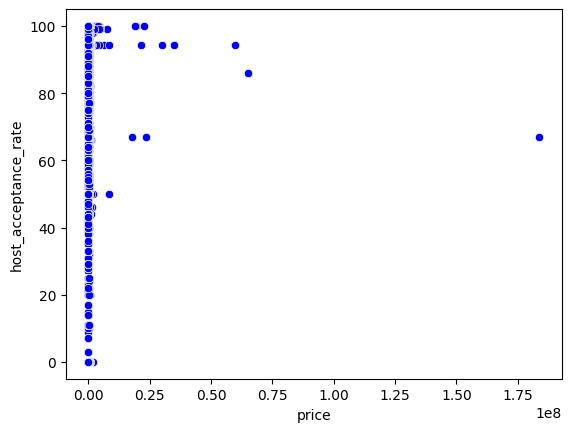

In [148]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro2)

In [149]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['price']]
Var_Dep= filtro2['host_acceptance_rate']


In [150]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [151]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [152]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [153]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.21901124e-08]),
 'rank_': 1,
 'singular_': array([2.16083042e+08]),
 'intercept_': 88.01105776795997}

In [154]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

2.650637699541658e-05

In [155]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

2.650637699541658e-05

In [156]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.005148434421784605

# **host_acceptance_rate vs number_of_reviews**

## **Filtro 1**

In [241]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",143400.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",83000.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",146900.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",365800.0,t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",1800000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",98000.0,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",76000.0,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",152000.0,t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",120000.0,t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

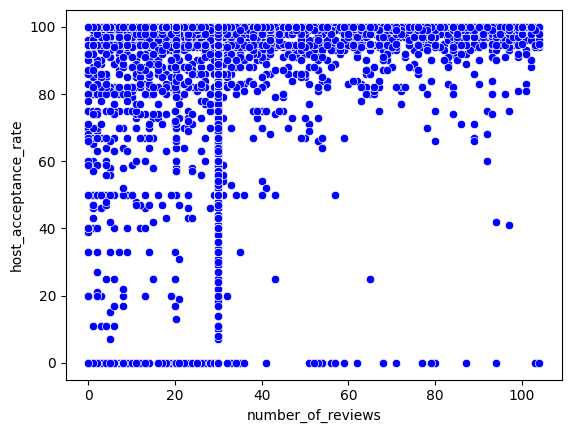

In [242]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro1)

In [237]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['number_of_reviews']]
Var_Dep= filtro1['host_acceptance_rate']


In [238]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [239]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [240]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [243]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.12028001]),
 'rank_': 1,
 'singular_': array([1850.21750578]),
 'intercept_': 90.09391823246928}

In [244]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.011265735862212245

In [245]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011265735862212245

In [246]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1061401708224188

## **Filtro 2**

In [247]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",108900.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",72600.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",37500.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",283500.0,t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",124400.0,t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",128000.0,t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",75000.0,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",60000.0,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",25100.0,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

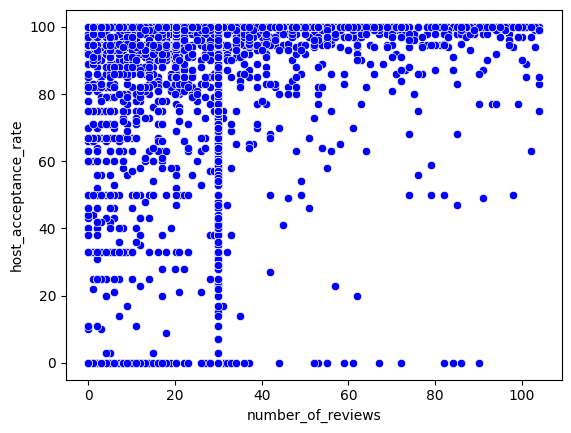

In [248]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro2)

In [249]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['number_of_reviews']]
Var_Dep= filtro2['host_acceptance_rate']


In [250]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [251]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [252]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [253]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3073093]),
 'rank_': 1,
 'singular_': array([1404.24795825]),
 'intercept_': 79.82329668949387}

In [254]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.038812493694940886

In [255]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.038812493694940886

In [256]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.19700886704648826

# **review_scores_location vs review_scores_cleanliness**

## **Filtro 1**

In [258]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",143400.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",83000.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",146900.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",365800.0,t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",1800000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",98000.0,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",76000.0,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",152000.0,t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",120000.0,t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

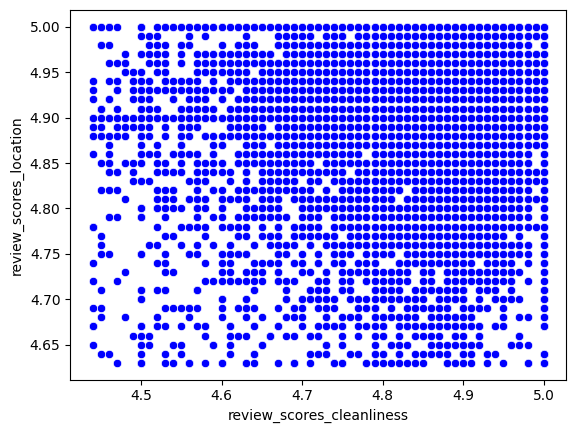

In [259]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro1)

In [260]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['review_scores_cleanliness']]
Var_Dep= filtro1['review_scores_location']


In [261]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [262]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [263]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [264]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.14898977]),
 'rank_': 1,
 'singular_': array([16.08600204]),
 'intercept_': 4.1916151235843095}

In [265]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.048431650867506226

In [266]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.048431650867506226

In [267]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2200719220334712

## **Filtro 2**

In [268]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",108900.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",72600.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",37500.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",283500.0,t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",124400.0,t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",128000.0,t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",75000.0,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",60000.0,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",25100.0,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

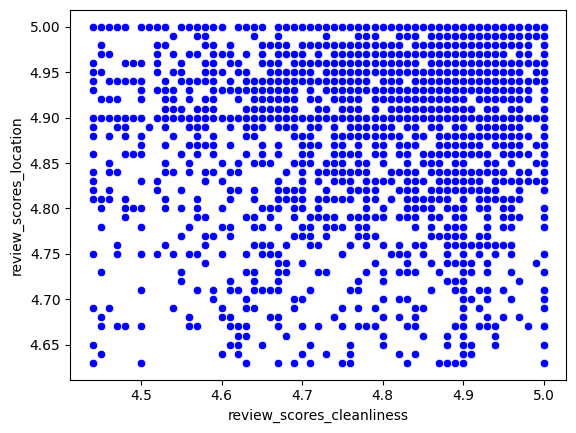

In [269]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro2)

In [270]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['review_scores_cleanliness']]
Var_Dep= filtro2['review_scores_location']


In [271]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [272]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [273]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [274]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.1734587]),
 'rank_': 1,
 'singular_': array([11.66855476]),
 'intercept_': 4.0840156471570594}

In [275]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.07555136997312606

In [276]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.07555136997312606

In [277]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.27486609462268363

# **availability_365 vs number_of_reviews**

## **Filtro 1**

In [330]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",143400.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",83000.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",146900.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",365800.0,t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",1800000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",98000.0,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",76000.0,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",152000.0,t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",120000.0,t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

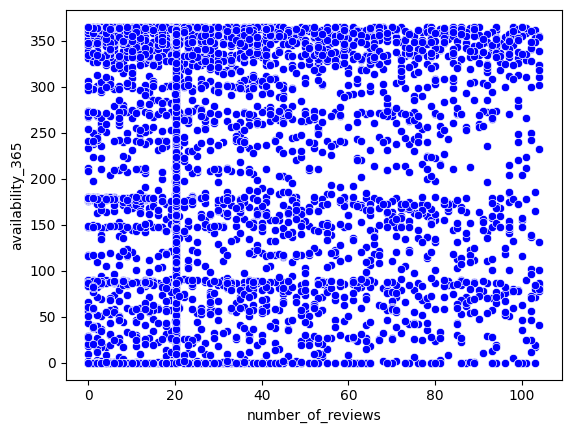

In [331]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro1)

In [332]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['number_of_reviews']]
Var_Dep= filtro1['availability_365']


In [333]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [334]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [335]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [336]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.17272048]),
 'rank_': 1,
 'singular_': array([1850.21750578]),
 'intercept_': 236.06386026921768}

In [337]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0013271670432534188

In [338]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0013271670432534188

In [339]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.036430303913821786

## **Filtro 2**

In [340]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",108900.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",72600.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",37500.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",283500.0,t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",124400.0,t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",128000.0,t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",75000.0,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",60000.0,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",25100.0,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

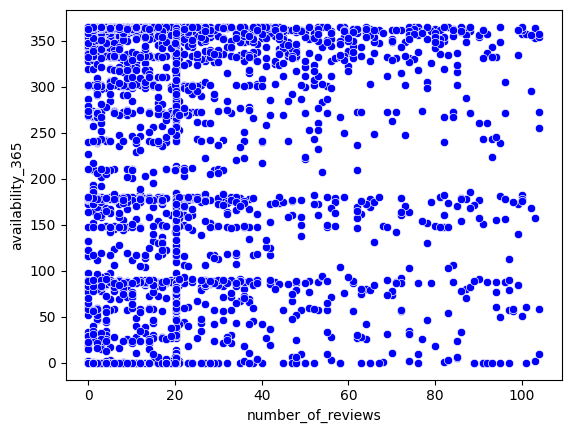

In [341]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro2)

In [342]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['number_of_reviews']]
Var_Dep= filtro2['availability_365']


In [343]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [344]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [345]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [346]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.1410372]),
 'rank_': 1,
 'singular_': array([1404.24795825]),
 'intercept_': 238.57840764281792}

In [347]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.000758117779503964

In [348]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.000758117779503964

In [349]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.027533938684902382

# **reviews_per_month vs review_scores_communication**

## **Filtro 1**

In [350]:
filtro1 = df[df["room_type"]== "Entire home/apt"]
filtro1

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,2.056638e+06,10531228,19.35353,-99.16299,20230329041210,3.0,7.0,3.0,1.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",143400.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,2.072354e+06,16840050,19.35358,-99.16948,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",83000.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,6.960370e+05,3531879,19.4418,-99.18402,20230329041210,4.0,4.0,6.0,3.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",146900.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.579700e+04,153786,19.38283,-99.27178,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",365800.0,t,2023-03-29,No Data Available,No Data Available,f
4,4.461600e+04,196253,19.41162,-99.17794,20230329041210,16.0,16.0,2.9,1.4,1.6,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",1800000.0,t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24218,8.537903e+17,29239005,19.41121,-99.174161,20230329041210,3.0,3.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet and dresser"", ""Smok...",98000.0,t,2023-03-29,No Data Available,No Data Available,t
24220,8.539236e+17,488030249,19.396663,-99.148145,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",76000.0,t,2023-03-30,No Data Available,No Data Available,f
24221,8.539667e+17,506816029,19.392023,-99.118722,20230329041210,1.0,1.0,7.0,2.0,3.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...",152000.0,t,2023-03-29,No Data Available,No Data Available,t
24223,8.542477e+17,7799414,19.403792,-99.164978,20230329041210,13.0,13.0,2.0,1.0,1.0,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Condit...",120000.0,t,2023-03-30,No Data Available,No Data Available,t


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

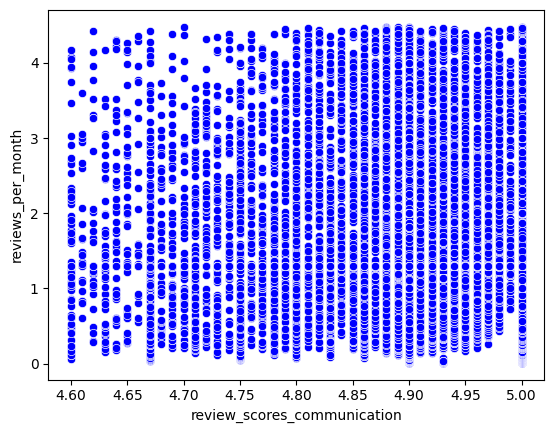

In [351]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro1)

In [352]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['review_scores_communication']]
Var_Dep= filtro1['reviews_per_month']


In [353]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [354]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [355]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [356]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.52930712]),
 'rank_': 1,
 'singular_': array([11.19591211]),
 'intercept_': 9.010517152088346}

In [357]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.016831587278058113

In [358]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.016831587278058113

In [359]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12973660731674044

## **Filtro 2**

In [ ]:
filtro2 = df[df["room_type"]== "Private room"]
filtro2

,id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,6.179200e+04,299558,19.41083,-99.18057,20230329041210,2.0,3.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",108900.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,7.609120e+05,3817743,19.40891,-99.16083,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",72600.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,2.088218e+06,10659485,19.34022,-99.15306,20230329041210,1.0,2.0,1.0,1.0,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",37500.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,2.093036e+06,3083561,19.44178,-99.20202,20230329041210,1.0,2.0,2.0,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",283500.0,t,2023-03-29,No Data Available,No Data Available,f
21,1.316100e+05,647454,19.35416,-99.16488,20230329041210,3.0,4.0,2.0,1.0,1.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",124400.0,t,2023-03-29,No Data Available,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,8.564739e+17,505303275,19.424343,-99.166729,20230329041210,6.0,6.0,4.0,1.0,2.0,...,Private room in rental unit,Private room,1 private bath,"[""Smoke alarm"", ""Wifi"", ""Hot tub"", ""Washer"", ""...",128000.0,t,2023-03-30,No Data Available,No Data Available,t
24214,8.537077e+17,506768013,19.433628,-99.181902,20230329041210,1.0,1.0,2.0,2.0,3.0,...,Private room in rental unit,Private room,1 shared bath,"[""Wifi"", ""Patio or balcony"", ""Washer"", ""Refrig...",75000.0,t,2023-03-30,No Data Available,No Data Available,f
24216,8.537468e+17,68325043,19.427807,-99.171424,20230329041210,1.0,1.0,2.0,1.0,1.0,...,Private room in rental unit,Private room,1 private bath,"[""Dedicated workspace"", ""Wifi"", ""Paid parking ...",60000.0,t,2023-03-29,No Data Available,No Data Available,f
24219,8.539220e+17,506810572,19.385117,-99.117693,20230329041210,4.0,4.0,2.0,1.0,1.0,...,Private room in home,Private room,1 shared bath,"[""Wifi"", ""Washer"", ""Pets allowed"", ""Outdoor sh...",25100.0,t,2023-03-29,No Data Available,No Data Available,t


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

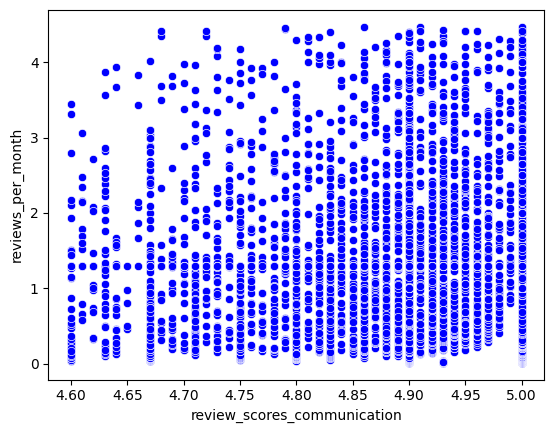

In [360]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro2)

In [361]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['review_scores_communication']]
Var_Dep= filtro2['reviews_per_month']


In [362]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [363]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [364]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [365]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.00622782]),
 'rank_': 1,
 'singular_': array([7.88247418]),
 'intercept_': 10.901858899423821}

In [366]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.040030157710415515

In [367]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.040030157710415515

In [368]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.20007538007065115


---

# **California**

---



# **Preparación**

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
#Cargar archivo
df_cal = pd.read_csv ('California_EUA_LIMPIO.csv')
df_cal.head(5)

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,958.0,1169,37.77028,-122.43317,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5858.0,8904,37.74474,-122.42089,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
2,8142.0,21994,37.76555,-122.45213,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
3,8339.0,24215,37.77564,-122.43642,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8739.0,7149,37.76030,-122.42197,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


## **Limpieza Inicial**

Se realizó una limpieza final del archivo. Algunas columnas encontraban en formato str y se obtuvo un promedio para aquellos valores iguales o mayor a 1, para posteriormente cambiar los valores a float y no modificar el tamaño de la columna o los datos. 

In [415]:
(df_cal["host_acceptance_rate"] == "No Data Available").sum()

801

In [416]:
# Eliminar los símbolos de porcentaje
df_cal['host_acceptance_rate'] = df_cal['host_acceptance_rate'].str.replace('%', '')
df_cal['host_acceptance_rate'] = df_cal['host_acceptance_rate'].str.replace('No Data Available', "77.92187024063357")

# Convertir la columna a tipo float
df_cal['host_acceptance_rate'] = df_cal['host_acceptance_rate'].astype(float)

In [417]:
promedio = df_cal.loc[df['host_acceptance_rate'] >= 1, 'host_acceptance_rate'].mean()
promedio

86.83434732724882

In [418]:
(df_cal["host_response_rate"] == "No Data Available").sum()

1019

In [419]:
# Eliminar los símbolos de porcentaje
df_cal['host_response_rate'] = df_cal['host_response_rate'].str.replace('%', '')
df_cal['host_response_rate'] = df_cal['host_response_rate'].str.replace('No Data Available', "81.70296881993137")

# Convertir la columna a tipo float
df_cal['host_response_rate'] = df_cal['host_response_rate'].astype(float)

In [420]:
promedio = df_cal.loc[df['host_response_rate'] >= 1, 'host_response_rate'].mean()
promedio

93.5872586303794

In [421]:
# Eliminar los símbolos de dinero
df_cal['price'] = df_cal['price'].str.replace('$', '').str.replace(',', '').str.replace('.', '')
df_cal['price'] = df_cal['price'].str.replace('No Data Available', "33005.869627920394")

# Convertir la columna a tipo float
df_cal['price'] = df_cal['price'].astype(float)

<ipython-input-421-06b268feb148>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal['price'] = df_cal['price'].str.replace('$', '').str.replace(',', '').str.replace('.', '')


In [422]:
promedio = df_cal.loc[df['price'] >= 1, 'price'].mean()
promedio

33005.869627920394

In [423]:
# Eliminar los valores str
#df_cal['number_of_reviews'] = df_cal['number_of_reviews'].str.replace('f', '0')
#df_cal['number_of_reviews'] = df_cal['number_of_reviews'].str.replace('No Data Available', "0")

# Convertir la columna a tipo float
#df_cal['number_of_reviews'] = df_cal['number_of_reviews'].astype(float)
#df_cal['number_of_reviews'].fillna(0, inplace=True)

In [424]:
promedio = df_cal.loc[df['number_of_reviews'] >= 1, 'number_of_reviews'].mean()
promedio

18.39352290679305

In [425]:
# Eliminar los valores str
#df_cal['availability_365'] = df_cal['availability_365'].str.replace('2023-03-05', '0')
#df_cal['availability_365'] = df_cal['availability_365'].str.replace('No Data Available', "0")

# Convertir la columna a tipo float
#df_cal['availability_365'] = df_cal['availability_365'].astype(float)
#df_cal['availability_365'].fillna(0, inplace=True)

In [426]:
promedio = df_cal.loc[df['availability_365'] >= 1, 'availability_365'].mean()
promedio

169.9380653073739

# **host_acceptance_rate vs host_response_rate**

## **Filtro 1**

In [427]:
df_cal["room_type"].value_counts()

Entire home/apt    4458
Private room       2359
Shared room          67
Hotel room           52
Name: room_type, dtype: int64

In [428]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

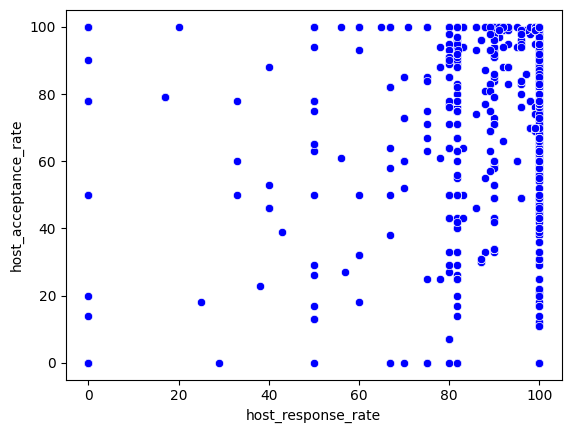

In [429]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro1)

In [430]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['host_response_rate']]
Var_Dep= filtro1['host_acceptance_rate']


In [431]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [432]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [433]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [434]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.46350804]),
 'rank_': 1,
 'singular_': array([830.87392439]),
 'intercept_': 41.96806401054669}

In [435]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08051762699686871

In [436]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08051762699686871

In [437]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2837562809822343

## **Filtro 2**

In [438]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

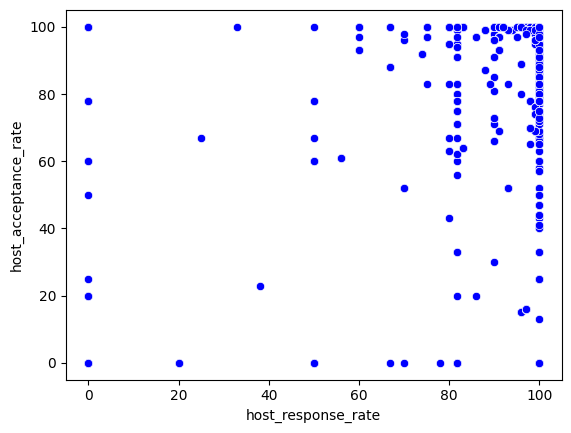

In [439]:
from turtle import color

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=filtro2)

In [440]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['host_response_rate']]
Var_Dep= filtro2['host_acceptance_rate']


In [441]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [442]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [443]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [444]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29448254]),
 'rank_': 1,
 'singular_': array([912.43367482]),
 'intercept_': 61.59027518180477}

In [445]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.08545903952757161

In [446]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.08545903952757161

In [447]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.29233378102362995

# **host_acceptance_rate vs price**

## **Filtro 1**

In [449]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

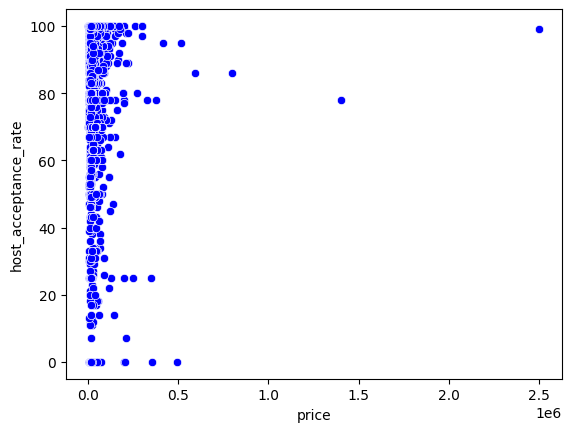

In [450]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro1)

In [451]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['price']]
Var_Dep= filtro1['host_acceptance_rate']


In [452]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [453]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [454]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [455]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.30682013e-05]),
 'rank_': 1,
 'singular_': array([3544010.1372397]),
 'intercept_': 86.30658852588392}

In [456]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0011644683655779309

In [457]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0011644683655779309

In [458]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03412430754722989

## **Filtro 2**

In [459]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

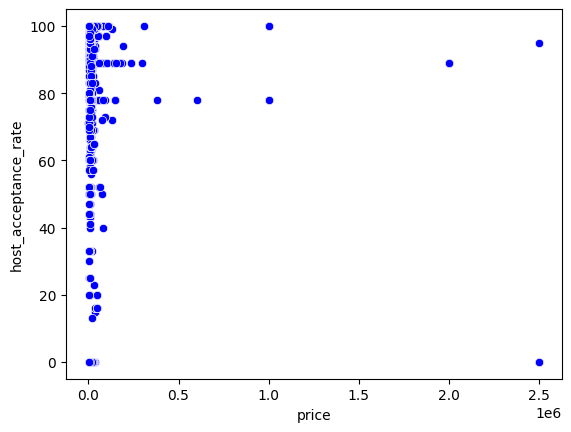

In [460]:
from turtle import color

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=filtro2)

In [461]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['price']]
Var_Dep= filtro2['host_acceptance_rate']


In [462]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [463]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [464]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [465]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.66048056e-06]),
 'rank_': 1,
 'singular_': array([9725231.50514804]),
 'intercept_': 88.71259041467067}

In [466]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0024316305316712805

In [467]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0024316305316712805

In [468]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.049311565901634886

# **host_acceptance_rate vs number_of_reviews**

## **Filtro 1**

In [470]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

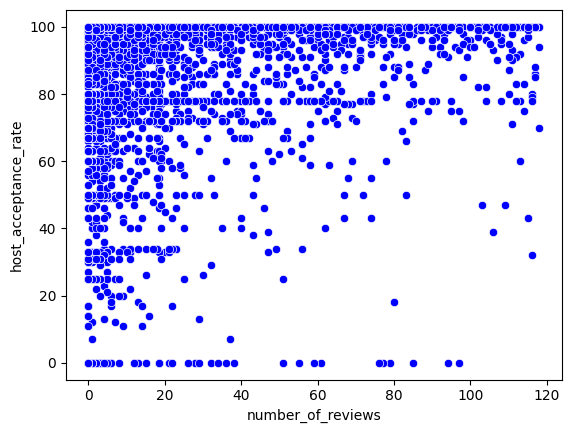

In [471]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro1)

In [472]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['number_of_reviews']]
Var_Dep= filtro1['host_acceptance_rate']


In [473]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [474]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [475]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [476]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.08990052]),
 'rank_': 1,
 'singular_': array([1660.39014988]),
 'intercept_': 84.35838376425318}

In [477]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.012096254160290032

In [478]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.012096254160290032

In [479]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10998297213791793

## **Filtro 2**

In [480]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

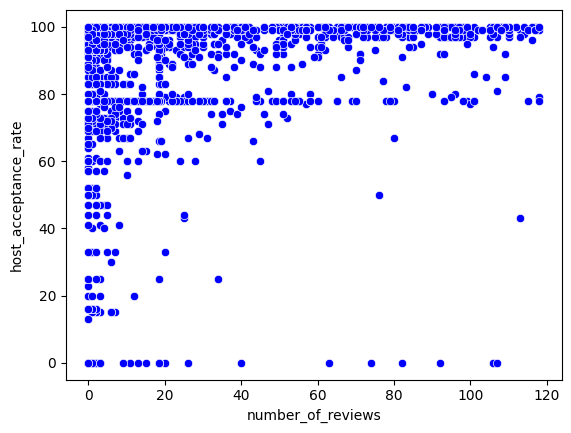

In [481]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=filtro2)

In [482]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['number_of_reviews']]
Var_Dep= filtro2['host_acceptance_rate']


In [483]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [484]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [485]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [486]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.11602895]),
 'rank_': 1,
 'singular_': array([1293.36559786]),
 'intercept_': 86.22490559245297}

In [487]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.026657019943027938

In [488]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.026657019943027938

In [489]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.16326977657554365

# **review_scores_location vs review_scores_cleanliness**

## **Filtro 1**

In [490]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

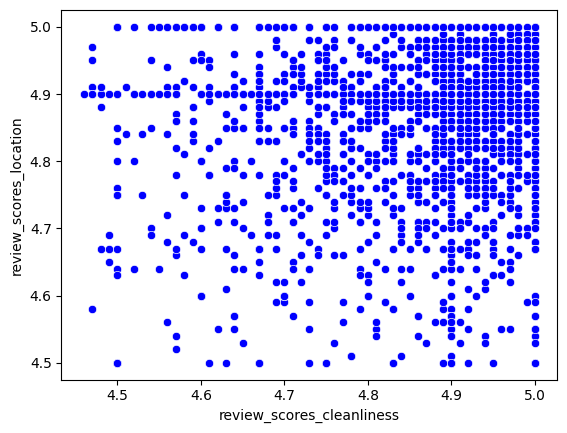

In [491]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro1)

In [492]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['review_scores_cleanliness']]
Var_Dep= filtro1['review_scores_location']


In [493]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [494]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [495]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [496]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.2063552]),
 'rank_': 1,
 'singular_': array([7.79708003]),
 'intercept_': 3.887419591250927}

In [497]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04979713882002512

In [498]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04979713882002512

In [499]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.22315272532511254

## **Filtro 2**

In [500]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

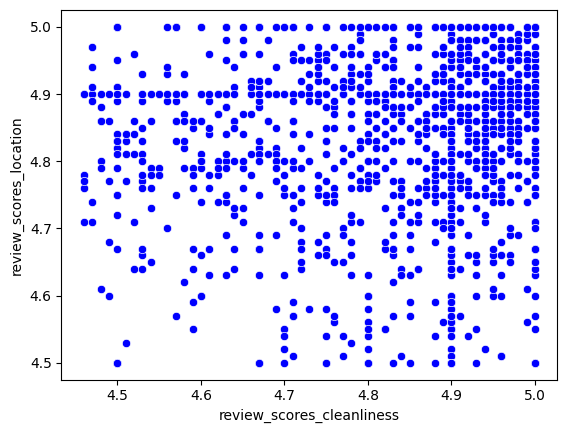

In [501]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=filtro2)

In [502]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['review_scores_cleanliness']]
Var_Dep= filtro2['review_scores_location']


In [503]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [504]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [505]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [507]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.2038219]),
 'rank_': 1,
 'singular_': array([6.50834191]),
 'intercept_': 3.8796189297282817}

In [508]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05224544302837997

In [509]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.05224544302837997

In [510]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.22857262090718558

# **availability_365 vs number_of_reviews**

## **Filtro 1**

In [512]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

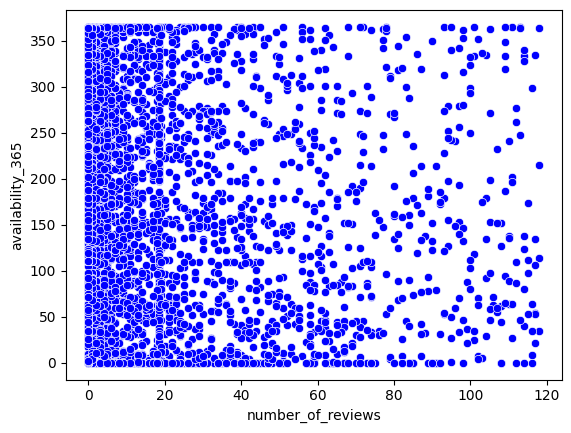

In [513]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro1)

In [514]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['number_of_reviews']]
Var_Dep= filtro1['availability_365']


In [515]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [516]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [517]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [518]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.5260898]),
 'rank_': 1,
 'singular_': array([1660.39014988]),
 'intercept_': 175.20140936357382}

In [519]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.01097685507017565

In [520]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.01097685507017565

In [521]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10477048759157156

## **Filtro 2**

In [522]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

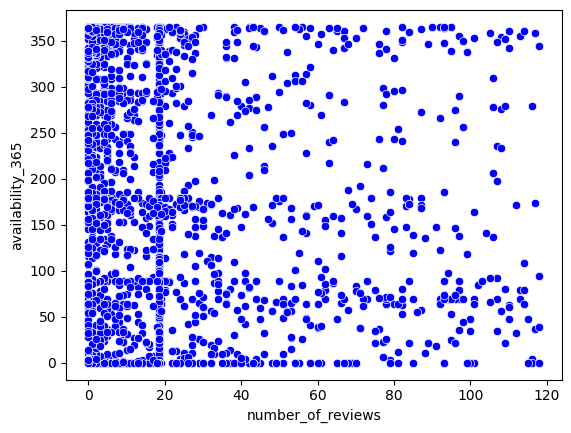

In [523]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=filtro2)

In [524]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['number_of_reviews']]
Var_Dep= filtro2['availability_365']


In [525]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [526]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [527]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [528]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.54646752]),
 'rank_': 1,
 'singular_': array([1293.36559786]),
 'intercept_': 188.0818615846327}

In [529]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.011576045280019986

In [530]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011576045280019986

In [531]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1075920316753057

# **reviews_per_month vs review_scores_communication**

## **Filtro 1**

In [534]:
filtro1 = df_cal[df_cal["room_type"]== "Entire home/apt"]
filtro1

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,1169,37.770280,-122.433170,2.020000e+13,1.0,1.0,3.0,1.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",20200.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,8904,37.744740,-122.420890,2.020000e+13,2.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",23500.0,t,06/03/2023,03/05/2009,06/08/2017,No Data Available,f
3,8.339000e+03,24215,37.775640,-122.436420,2.020000e+13,2.0,6.0,4.0,2.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",57500.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,1.421770e+05,656263,37.784400,-122.479320,2.020000e+13,1.0,2.0,4.0,2.0,2.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",25900.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,4.918670e+05,969518,37.771960,-122.434770,2.020000e+13,2.0,3.0,5.0,3.0,3.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",42500.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,8.170000e+17,4452428,37.784690,-122.392874,2.020000e+13,3.0,3.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Blender"", ""Shampoo"", ""TV"",...",11000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6928,8.180000e+17,9835117,37.784798,-122.393698,2.020000e+13,2.0,7.0,3.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Dishes and silverwa...",17500.0,f,06/03/2023,No Data Available,No Data Available,No Data Available,f
6931,8.180000e+17,495900269,37.791994,-122.410000,2.020000e+13,9.0,9.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",16400.0,t,06/03/2023,No Data Available,No Data Available,147904,t
6932,8.180000e+17,499392537,37.763060,-122.432023,2.020000e+13,1.0,1.0,2.0,1.0,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",22800.0,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

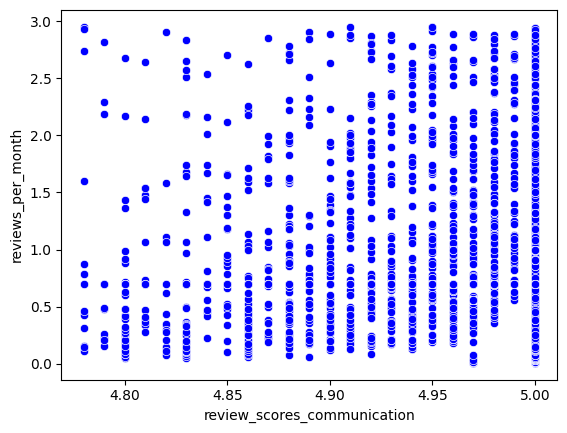

In [535]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro1)

In [536]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro1[['review_scores_communication']]
Var_Dep= filtro1['reviews_per_month']


In [537]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [538]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [539]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [540]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.76004339]),
 'rank_': 1,
 'singular_': array([3.02709422]),
 'intercept_': 14.37330436951475}

In [541]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.043322404306527784

In [542]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.043322404306527784

In [543]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.20814034761796615

## **Filtro 2**

In [544]:
filtro2 = df_cal[df_cal["room_type"]== "Private room"]
filtro2

,ï»¿id,host_id,latitude,longitude,scrape_id,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,8.142000e+03,21994,37.765550,-122.452130,2.020000e+13,13.0,14.0,1.0,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",5600.0,t,06/03/2023,08/09/2014,27/10/2022,No Data Available,f
4,8.739000e+03,7149,37.760300,-122.421970,2.020000e+13,2.0,2.0,3.0,1.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",11000.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,4.909310e+05,1269188,37.747660,-122.420410,2.020000e+13,1.0,3.0,2.0,1.0,1.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",10000.0,t,06/03/2023,22/04/2014,26/11/2022,No Data Available,f
7,1.053700e+04,36752,37.717500,-122.396980,2.020000e+13,2.0,3.0,2.0,1.0,1.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",9500.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,1.449780e+05,216682,37.792330,-122.424310,2.020000e+13,9.0,9.0,1.0,1.0,1.0,...,Private room,No Data Available,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",5500.0,t,06/03/2023,10/07/2011,28/02/2023,No Data Available,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8.170000e+17,486687635,37.788619,-122.422556,2.020000e+13,32.0,38.0,2.0,1.0,1.0,...,Private room,1 private bath,"[""Security cameras on property"", ""Self check-i...",8000.0,t,06/03/2023,13/02/2023,13/02/2023,Exempt,f
6929,8.180000e+17,226555948,37.725231,-122.404776,2.020000e+13,5.3,7.7,2.0,1.0,1.0,...,Private room,1 shared bath,"[""Oven"", ""Security cameras on property"", ""Self...",4000.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f
6930,8.180000e+17,286802480,37.753771,-122.399004,2.020000e+13,6.0,10.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""Carbon monoxide alarm"", ""Security cameras on...",5600.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,t
6933,8.180000e+17,499294716,37.777633,-122.416478,2.020000e+13,1.0,1.0,1.0,1.0,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",10400.0,t,06/03/2023,No Data Available,No Data Available,No Data Available,f


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

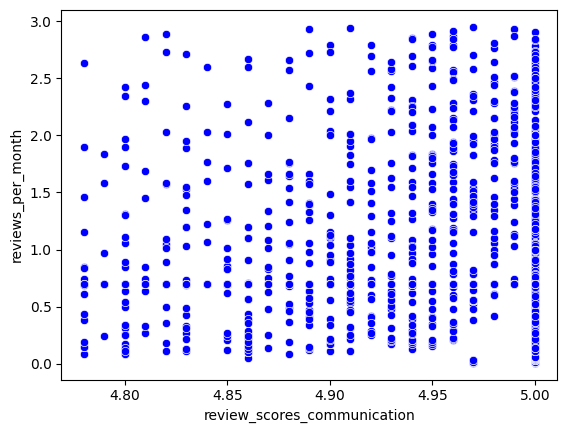

In [545]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=filtro2)

In [546]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtro2[['review_scores_communication']]
Var_Dep= filtro2['reviews_per_month']


In [547]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [548]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [549]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [550]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.38710042]),
 'rank_': 1,
 'singular_': array([2.54750218]),
 'intercept_': 12.581110293876867}

In [551]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03841226457706548

In [552]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03841226457706548

In [553]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1959904706282055